# Model building and training

### Importing Libraries

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import opendatasets as od

### Downloading dataset

In [4]:
od.download('https://www.kaggle.com/datasets/sumn2u/garbage-classification-v2')

Dataset URL: https://www.kaggle.com/datasets/sumn2u/garbage-classification-v2


100%|██████████| 744M/744M [00:11<00:00, 69.8MB/s]


### Loading data and preprocessing

In [66]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define constants
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Define ImageDataGenerators
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_test_gen   = ImageDataGenerator(preprocessing_function=preprocess_input)

# Define generator functions (copied from preprocessing.py)
def get_train_generator(train_dir):
  print(f"Inside get_train_generator. Received train_dir: {train_dir}")
  return train_gen.flow_from_directory(train_dir,
                                      target_size=IMG_SIZE,
                                      batch_size=BATCH_SIZE,
                                      class_mode='categorical')

def get_val_test_generator(val_test):
  print(f"Inside get_val_test_generator. Received val_test: {val_test}")
  return val_test_gen.flow_from_directory(val_test,
                                      target_size=IMG_SIZE,
                                      batch_size=BATCH_SIZE,
                                      class_mode='categorical',
                                      shuffle=False)

# Define directory paths
BASE_DIR = "/content/NTI-final_projects/garbage_classifier/data/preprocessed_data"
train_dir = os.path.join(BASE_DIR, 'train')
val_dir = os.path.join(BASE_DIR, 'val')
test_dir = os.path.join(BASE_DIR, 'test')

print(f"Train directory defined in notebook: {train_dir}")
print(f"Validation directory defined in notebook: {val_dir}")
print(f"Test directory defined in notebook: {test_dir}")

# Create data generators
train_data = get_train_generator(train_dir)
val_data = get_val_test_generator(val_dir)
test_data = get_val_test_generator(test_dir)

Train directory defined in notebook: /content/NTI-final_projects/garbage_classifier/data/preprocessed_data/train
Validation directory defined in notebook: /content/NTI-final_projects/garbage_classifier/data/preprocessed_data/val
Test directory defined in notebook: /content/NTI-final_projects/garbage_classifier/data/preprocessed_data/test
Inside get_train_generator. Received train_dir: /content/NTI-final_projects/garbage_classifier/data/preprocessed_data/train
Found 13827 images belonging to 10 classes.
Inside get_val_test_generator. Received val_test: /content/NTI-final_projects/garbage_classifier/data/preprocessed_data/val
Found 3972 images belonging to 10 classes.
Inside get_val_test_generator. Received val_test: /content/NTI-final_projects/garbage_classifier/data/preprocessed_data/test
Found 1963 images belonging to 10 classes.


### Building the model using ResNet50 (initial training)

In [67]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

In [68]:
# Freeze base model layers to not train them initially
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)  # better than Flatten here for CNN features
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [69]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Train only top layers first
history = model.fit(train_data, epochs=10, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.7972 - loss: 0.6558

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


433/433 ━━━━━━━━━━━━━━━━━━━━ 96s 188ms/step - accuracy: 0.7974 - loss: 0.6553 - val_accuracy: 0.9230 - val_loss: 0.2369
Epoch 2/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 69s 158ms/step - accuracy: 0.9207 - loss: 0.2325 - val_accuracy: 0.9275 - val_loss: 0.2165
Epoch 3/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 69s 160ms/step - accuracy: 0.9383 - loss: 0.1838 - val_accuracy: 0.9325 - val_loss: 0.2110
Epoch 4/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 68s 157ms/step - accuracy: 0.9473 - loss: 0.1532 - val_accuracy: 0.9340 - val_loss: 0.2034
Epoch 5/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 74s 170ms/step - accuracy: 0.9506 - loss: 0.1514 - val_accuracy: 0.9383 - val_loss: 0.2092
Epoch 6/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 69s 159ms/step - accuracy: 0.9610 - loss: 0.1222 - val_accuracy: 0.9398 - val_loss: 0.2035
Epoch 7/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 71s 163ms/step - accuracy: 0.9621 - loss: 0.1096 - val_accuracy: 0.9418 - val_loss: 0.2010
Epoch 8/10
433/433 ━━━━━━━━━━━━━━━━━━━━ 69s 159ms/step - accuracy: 0.9665 - loss: 0.1009 - val

### Fine-tuning the model

In [70]:
# Unfreeze some deeper layers for fine-tuning (last 50 layers here)
for layer in base_model.layers[-50:]:
    layer.trainable = True

In [71]:
# Recompile with lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Continue training (fine-tuning)
history_fine = model.fit(train_data, epochs=5, validation_data=val_data)

Epoch 1/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 122s 219ms/step - accuracy: 0.9436 - loss: 0.1821 - val_accuracy: 0.9459 - val_loss: 0.2002
Epoch 2/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 84s 195ms/step - accuracy: 0.9753 - loss: 0.0774 - val_accuracy: 0.9486 - val_loss: 0.1949
Epoch 3/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 80s 184ms/step - accuracy: 0.9822 - loss: 0.0535 - val_accuracy: 0.9512 - val_loss: 0.1867
Epoch 4/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 80s 184ms/step - accuracy: 0.9858 - loss: 0.0394 - val_accuracy: 0.9547 - val_loss: 0.1865
Epoch 5/5
433/433 ━━━━━━━━━━━━━━━━━━━━ 81s 186ms/step - accuracy: 0.9910 - loss: 0.0252 - val_accuracy: 0.9554 - val_loss: 0.1915


### Evaluation

In [42]:
 # Evaluate on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.9625 - loss: 0.1382

Test Accuracy: 95.47%


In [74]:
# Predictions and classification report
y_true = test_data.classes
print("\nTrue Labels:", y_true)
y_pred = np.argmax(model.predict(test_data), axis=1)
print("Predicted Labels:", y_pred)
target_names = list(test_data.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))


True Labels: [0 0 0 ... 9 9 9]


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step
Predicted Labels: [0 0 0 ... 9 9 1]

Classification Report:
              precision    recall  f1-score   support

     battery       0.97      0.93      0.95        94
  biological       0.96      0.98      0.97        99
   cardboard       0.93      0.98      0.95       181
     clothes       0.99      0.99      0.99       528
       glass       0.94      0.95      0.95       304
       metal       0.90      0.90      0.90       101
       paper       0.93      0.95      0.94       167
     plastic       0.92      0.91      0.92       197
       shoes       0.96      0.97      0.97       197
       trash       0.95      0.88      0.92        95

    accuracy                           0.95      1963
   macro avg       0.95      0.94      0.94      1963
weighted avg       0.95      0.95      0.95      1963



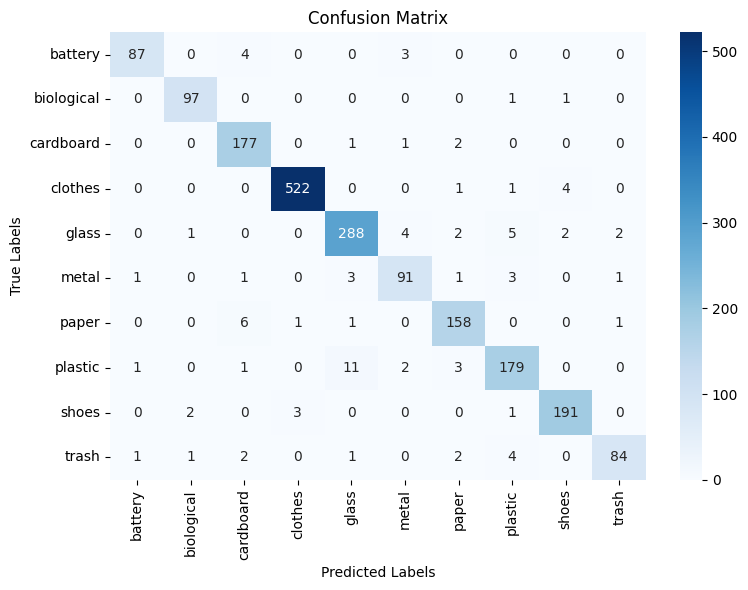

In [86]:
# Confusion matrix plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('ConfusionMatrix.png')
plt.show()

In [94]:
# Plot training & validation accuracy and loss for both training phases
def plot_history(histories, titles):
    plt.figure(figsize=(14, 5))
    # Accuracy plot
    plt.subplot(1, 2, 1)
    for history, title in zip(histories, titles):
        plt.plot(history.history['accuracy'], marker='o', label=f'{title} Train Acc')
        plt.plot(history.history['val_accuracy'], marker='o', linestyle='--', label=f'{title} Val Acc')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Loss plot
    plt.subplot(1, 2, 2)
    for history, title in zip(histories, titles):
        plt.plot(history.history['loss'], marker='o', label=f'{title} Train Loss')
        plt.plot(history.history['val_loss'], marker='o', linestyle='--', label=f'{title} Val Loss')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('History_Accuracy_Loss.png')

    plt.tight_layout()
    plt.show()

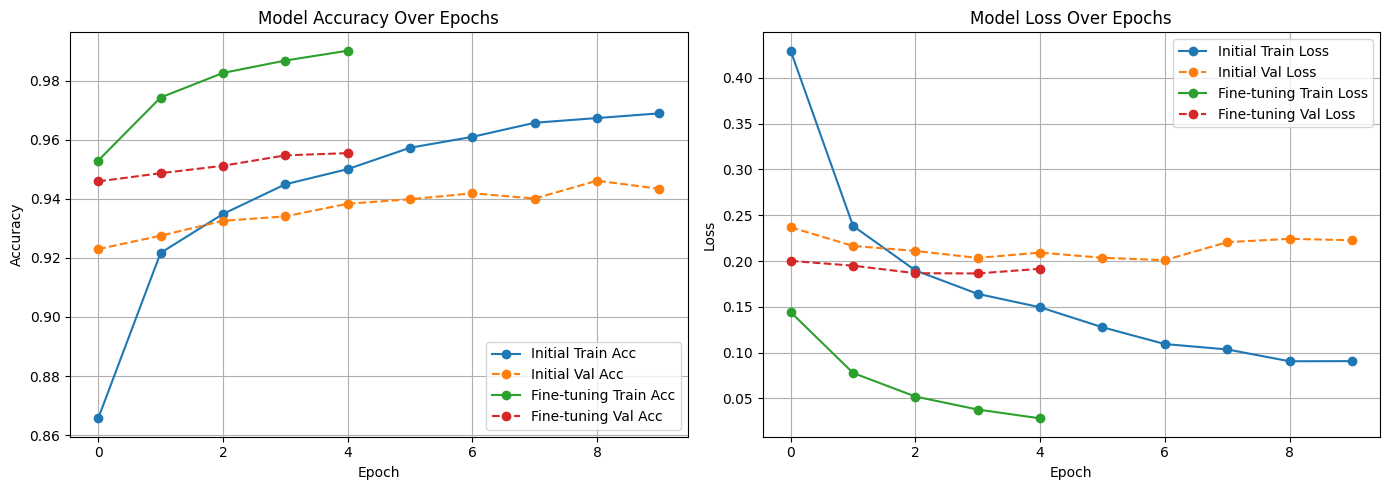

In [95]:
plot_history([history, history_fine], ['Initial', 'Fine-tuning'])
plt.show()

### Saving the model

In [49]:
model.save('/content/model.keras')

### Deployment using gradio

In [58]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

def predict_image(image, model):
  # Convert PIL image to numpy array
  img = image.convert("RGB").resize(IMG_SIZE)
  img_array = img_to_array(img) # Get array
  img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
  img_array = preprocess_input(img_array) # Apply ResNet50 preprocessing

  # Predict
  preds = model.predict(img_array)[0]

  # Add print statements for debugging
  print("Raw predictions (scores):", preds)
  print("Class names:", class_names)
  print("Predicted class index (argmax):", np.argmax(preds))
  print("Predicted class name:", class_names[np.argmax(preds)])

  pred_class = target_names[np.argmax(preds)]
  confidence = float(np.max(preds))

  return {label: float(score) for label, score in zip(target_names, preds)}

In [59]:
import gradio as gr
interface = gr.Interface(
    fn=lambda image: predict_image(image, model),
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=10),
    title="🗑️ Garbage Classifier",
    description="Upload an image of garbage to classify it into: cardboard, glass, metal, paper, plastic, or trash."
)

In [60]:
# Launch the interface
if __name__ == "__main__":
    # Create and launch the interface
    demo = interface

    # Launch with public link (set share=False for local only)
    demo.launch(
        share=True,  # Set to False for local only
        debug=True,
        server_name="0.0.0.0",  # Allow external connections
    )

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5433f46251ed24de20.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Raw predictions (scores): [5.4704848e-11 3.9463495e-11 8.8985169e-10 1.6025498e-10 3.4000767e-08
 1.2265331e-06 2.8570560e-06 9.9711031e-01 7.5377760e-12 2.8856150e-03]
Class names: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
Predicted class index (argmax): 7
Predicted class name: plastic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Raw predictions (scores): [4.1262293e-04 2.4231081e-06 1.5566251e-01 1.4512280e-04 4.8323386e-07
 2.0072982e-03 8.3744705e-01 1.4915166e-05 4.1515636e-06 4.3034675e-03]
Class names: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
Predicted class index (argmax): 6
Predicted class name: paper
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Raw predictions (scores): [1.0754944e-07 1.5455418e-08 9.8171151e-01 2.2075694e-05 4.9062048e-09
 4.4213926e-09 1.8265987e-02 4.1030246e-10 2.6196261e-07 5.4888151e-08]
Class names: ['

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/gradio/queueing.py", line 625, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 2191, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/gradio/blocks.py", line 1702, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Raw predictions (scores): [9.9995792e-01 1.6105051e-10 2.4591343e-10 6.7486586e-11 4.8628963e-06
 3.3682099e-05 4.3160824e-07 5.1085073e-07 1.8879328e-08 2.4474132e-06]
Class names: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
Predicted class index (argmax): 0
Predicted class name: battery
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Raw predictions (scores): [4.2779782e-05 3.6244024e-10 4.4660859e-12 9.9850629e-14 3.3885241e-04
 9.9961805e-01 7.0755157e-10 1.8398144e-07 9.3420459e-11 9.2836461e-10]
Class names: ['battery', 'biological', 'cardboard', 'clothes', 'glass', 'metal', 'paper', 'plastic', 'shoes', 'trash']
Predicted class index (argmax): 5
Predicted class name: metal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Raw predictions (scores): [1.0000000e+00 3.1341346e-15 1.1566285e-12 3.3198484e-18 1.9083335e-12
 8.5848813e-09 1.1317721e-12 8.0933025e-13 3.9407717e-14 3.0335545e-12]
Class names: ['